In this analysis I am implementing Multiple Linear Regression using scikit-learn on my zRankings dataset.


## Import Libraries

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns

## Import Dataset

In [3]:
zRankings = pd.read_csv('zRankings.csv')

In [19]:
zRankings.shape

(220, 27)

In [4]:
zRankings.describe()

,Unnamed: 0,"% of Days With More Than 6"" of Snow",% of East-facing Terrain,"% of Months With Less Than 30"" of Snow","% of Months With More Than 90"" of Snow",% of North-facing Terrain,% of South-facing Terrain,% of West-facing Terrain,Acreage,Base Elevation (ft),...,Overall Ranking,Regional Ranking,Snow Quality Rank,Snowfall Score,State Ranking,Terrain Parks,Top Elevation (ft),Total Runs,Total Snow Score With Preservation,True Snow Per Year (inches)
count,220.000000,219.000000,220.00000,219.000000,219.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,219.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,109.500000,10.085388,30.85000,37.604110,9.831507,41.454545,11.672727,16.090909,1154.395455,4707.859091,...,110.500000,21.854545,110.945205,50.090455,7.104545,1.731818,6584.677273,66.236364,50.534091,247.718182
std,63.652704,4.506343,20.95157,22.586739,13.187935,21.879761,16.616331,18.432919,1242.775099,2954.255218,...,63.652704,19.320340,63.454287,16.612122,5.551994,1.912680,3318.425624,44.693053,19.315725,109.295806
min,0.000000,2.500000,0.00000,1.300000,0.000000,0.000000,0.000000,0.000000,60.000000,33.000000,...,1.000000,1.000000,1.000000,10.200000,1.000000,0.000000,400.000000,7.000000,11.100000,55.000000
25%,54.750000,6.050000,15.00000,18.050000,0.500000,29.500000,0.000000,0.000000,297.500000,1678.750000,...,55.750000,7.000000,56.500000,37.850000,3.000000,0.000000,3627.750000,34.750000,34.450000,156.000000
50%,109.500000,9.300000,30.00000,35.000000,3.200000,42.000000,3.500000,10.000000,640.000000,4649.000000,...,110.500000,16.000000,111.000000,47.650000,6.000000,1.000000,6975.000000,53.500000,52.950000,233.500000
75%,164.250000,13.050000,45.00000,55.500000,14.700000,60.000000,20.000000,25.000000,1600.000000,7004.000000,...,165.250000,31.000000,165.500000,61.000000,10.000000,3.000000,9086.250000,86.500000,65.225000,322.000000
max,219.000000,26.800000,90.00000,93.000000,63.600000,85.000000,80.000000,100.000000,8171.000000,10800.000000,...,220.000000,76.000000,220.000000,100.000000,23.000000,9.000000,12840.000000,324.000000,100.000000,651.000000


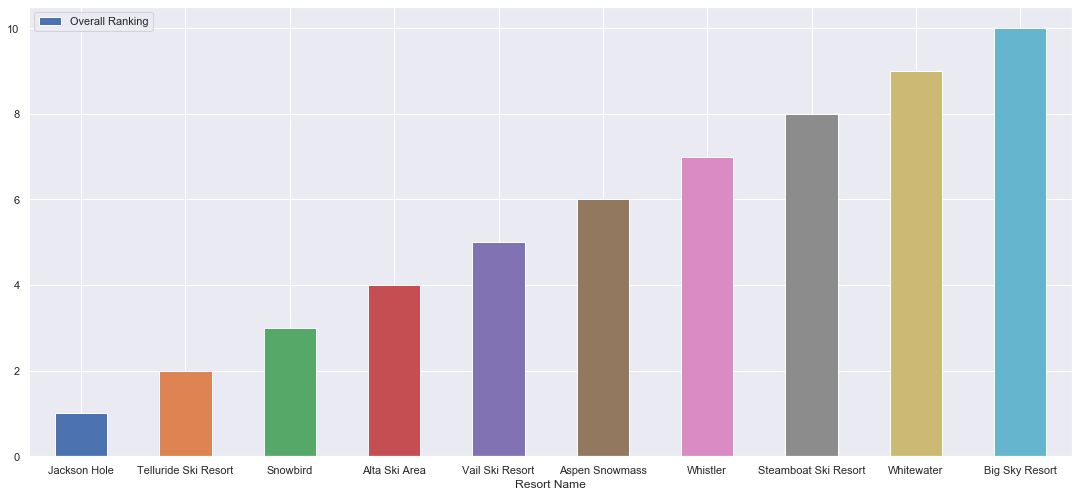

In [87]:
# Rankings Top 10 Ski Resorts

zRankingsTop10 = zRankings.head(10)
zRankingsTop10.plot.bar(x='Resort Name', y='Overall Ranking', rot=0)

## Data Cleanup

In [5]:
# Display all columns
pd.set_option('display.max_columns', 35)

# Remove previous index column
del zRankings['Unnamed: 0']

# Sort by Overall Ranking (asc)
zRankings = zRankings.sort_values(by=['Overall Ranking'], ascending=True)

# Fill NAN cells
zRankings = zRankings.fillna(method='ffill')

# Convert cols list to numeric (Currently stored as)
cols = ['% of Days With More Than 6" of Snow', '% of Months With Less Than 30" of Snow', '% of Months With More Than 90" of Snow', 'Dump Potential Rank', 'Snow Quality Rank', 'Uphill Max (ppl/hr)']
zRankings[cols] = zRankings[cols].apply(pd.to_numeric, errors='coerce', axis=1)
zRankings.head()

,"% of Days With More Than 6"" of Snow",% of East-facing Terrain,"% of Months With Less Than 30"" of Snow","% of Months With More Than 90"" of Snow",% of North-facing Terrain,% of South-facing Terrain,% of West-facing Terrain,Acreage,Base Elevation (ft),Dump Potential Rank,Halfpipes,Lifts,Longest Run (ft),Overall Ranking,Regional Ranking,Resort Name,Snow Quality Rank,Snowfall Score,State,State Ranking,Terrain Parks,Top Elevation (ft),Total Runs,Total Snow Score With Preservation,True Snow Per Year (inches),Uphill Max (ppl/hr),Zone
27,15.6,60,9.9,29.7,10,30,0,2500,6311,17.0,0,12,38000,1,1,Jackson Hole,29.0,75.2,WY,1,5,10450,116,72.4,368,17833.0,Rockies
33,10.8,10,23.1,4.8,50,7,33,2000,8725,95.0,0,18,24288,2,2,Telluride Ski Resort,34.0,52.4,CO,1,0,12570,125,70.2,276,22386.0,Rockies
1,18.0,16,3.4,37.0,50,13,21,2500,7760,5.0,0,11,13200,3,3,Snowbird,2.0,90.0,UT,1,1,11000,85,97.5,497,17400.0,Rockies
0,20.2,17,1.3,49.3,53,1,29,2200,8530,2.0,0,11,16800,4,4,Alta Ski Area,1.0,96.1,UT,2,0,10550,50,100.0,517,11248.0,Rockies
13,13.9,20,10.7,18.2,40,20,20,5289,8120,22.0,1,31,15840,5,5,Vail Ski Resort,14.0,71.7,CO,2,4,11570,193,78.3,354,53381.0,Rockies


## Define X and Y

In [6]:
# Independent Varaibles - dropping string columns, y variable, and uphill max for 
x = zRankings.drop(['Overall Ranking', 'Resort Name', 'State', 'Zone', 'Uphill Max (ppl/hr)'], axis=1).values

# Setting Overall Ranking as dependent variable
y = zRankings['Overall Ranking'].values

## Split Dataset in Training Set and Test Set

In [7]:
'''
Split dataset into 2 sets
1. Training Set: Used for training
2. Test Set: Used for testing
'''

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

## Train Model on Training Set + Test Set and Evaluating Model

In [8]:
# Fitting Linear Regression to the Training set
ml = LinearRegression()

# Passing independent variables and dependent variable to form / train the model
ml.fit(x_train, y_train)

'''
Report the coefficient of determination from the training and testing sets

Training Set: Results show that 94.1% of the variance of Total Ranking being studied is 
explained by the variance of the independent variable.

Test Set: Results show that 91.5% of the variance of Total Ranking being studied is 
explained by the variance of the independent variable.

''' 
print("R^2 for train set: %f" %ml.score(x_train, y_train))

print('-'*50)

print("R^2 for test set: %f" %ml.score(x_test, y_test))

R^2 for train set: 0.941601
--------------------------------------------------
R^2 for test set: 0.915689


In [9]:
ml.coef_, ml.intercept_

(array([-1.33161366e+00,  1.47648637e+00,  3.97765784e-01, -1.27856724e-01,
         1.53675070e+00,  1.58293226e+00,  1.45133168e+00, -2.15205060e-03,
         1.51637056e-02,  4.19924700e-01,  5.16820603e+00, -4.15362029e-01,
        -2.49383007e-05,  1.39661532e-01,  1.87827359e-01,  1.43396453e+00,
         6.61629830e-01, -1.40000227e-01, -1.73807332e-02, -9.16115227e-02,
        -7.51146339e-01, -2.85277473e-03]), -94.05756518560283)

In [10]:
ml1 = LinearRegression()
ml2 = LinearRegression()
ml1.fit(x_train, y_train)
ml2.fit(x_test, y_test)

ml1.coef_

ml2.coef_

array([ 4.60584089e+00,  1.46452877e+00,  2.31670784e-01, -1.12757682e+00,
        1.54848368e+00,  1.53399448e+00,  1.44218822e+00, -1.49138408e-03,
        1.13391971e-02,  7.33221248e-01, -4.49359381e+00,  3.99498115e-01,
       -1.15594199e-04,  3.19437607e-01,  1.56925157e-03,  2.85504538e+00,
        6.24078569e-01, -1.51342526e-01, -1.16143869e-02, -1.48301205e-01,
       -2.30155309e+00, -5.97625795e-02])

## Test Set

In [11]:
# Predicting the result of overall ranking given the X variables
y_pred = ml.predict(x_test)
print(y_pred)

[117.32536511 130.27899871 157.19392996 151.26667506  27.35859544
 105.36394763 163.88329455 211.53602922  62.61420011 139.27301535
  98.15949138  29.67685673 182.52151093  -9.63869232  75.89594089
 237.9076855  173.54354531  13.36227545 216.72484878  89.3057455
 202.41731882  77.88322624 210.67147103  23.13302935 125.18679231
 217.71436391  99.34646325  36.83588333  25.49124307 122.71868454
 116.9111275  114.13254663  91.13991312 186.93017514  46.42211592
 113.20694852  84.14715368 171.29238343 152.40882212 103.99101663
  85.0921468  204.67232493 112.67840204 101.33310428  82.52419911
 228.98785956  98.02889936 140.81956649 136.16584157 143.01283786
 213.29864285  56.87685025  38.34786463 170.85433546 140.20523423
  54.69638948  42.4862389   60.10504117 201.73477866  62.45361168
  72.28004228   4.82841557 183.06263105  81.86344737 144.64267702
 159.82952145 156.34503221  48.53758471  85.43274929 181.75659316
 161.97866858  36.10046334 -12.02716047]


In [12]:
# Predicting overall ranking of values in row 1
ml.predict([[15.6,60,9.9,29.7,10,30,0,2500,6311,17.0,0,12,38000,1,29.0,75.2,1,5,10450,116,72.4,368]])

array([-6.02680389])

## Plot Results of Actual vs Predicted Overall Rankings

Text(0.5, 1.0, 'Actual vs Predicted')

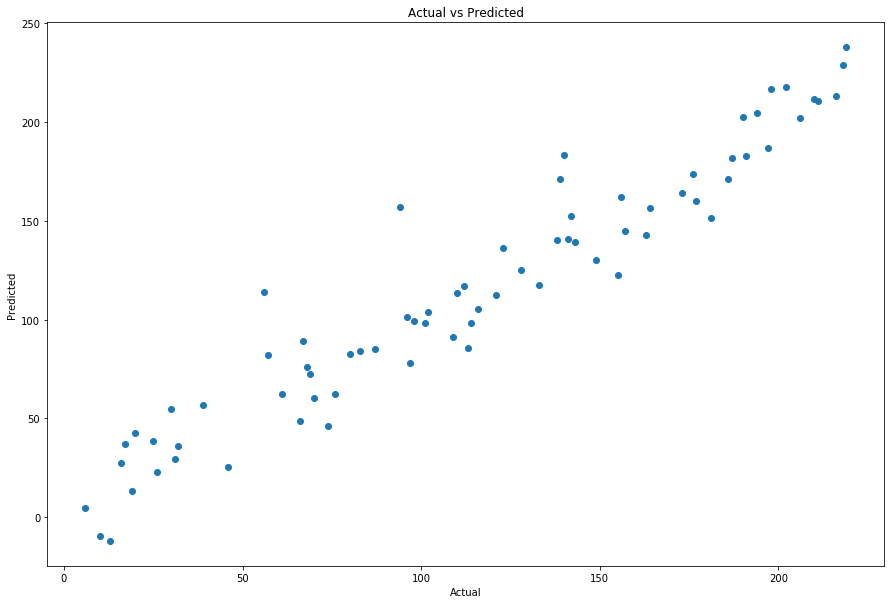

In [13]:
plt.figure(figsize = (15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

## Predicted Values

In [14]:
'''
The difference between actual resort raking value(s) and predicted resort ranking value
is high. This reveals that a ski resort's snow data will not accurately predict
a ski resort ranking.
'''

pred_y_zRankings = pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred, 'Difference': y_test-y_pred})
pred_y_zRankings

,Actual Value,Predicted Value,Difference
0,133,117.325365,15.674635
1,149,130.278999,18.721001
2,94,157.193930,-63.193930
3,181,151.266675,29.733325
4,16,27.358595,-11.358595
5,116,105.363948,10.636052
6,173,163.883295,9.116705
7,210,211.536029,-1.536029
8,76,62.614200,13.385800
9,143,139.273015,3.726985


## OLS Regression Results

###### 1. Adjusted R-squared &  R-squared are close to 1.0. The model fits well.
###### 2. Adjusted R-squared <  R-squared. This could be becuase there could be variables that are not relevent.
###### 3. P-value is close to 0 (less than 0.05) and F-statistic is (somewhat) large. This signifies that there is a good linear relationship between my independent variables and dependent variable.
###### 4. Variables 9,10,16,17, and 19 have a p-value < 0.05. We can reject the null hypothesis for these variables. All other variables are irrelevent in our regression model. There variables are: Base Elevation (ft), Dump Potential Rank, Snowfall Score, State Ranking, Top Elevation (ft)

In [58]:
xNames = zRankings.drop(['Overall Ranking', 'Resort Name', 'State', 'Zone', 'Uphill Max (ppl/hr)'], axis=1).columns
xNames

Index(['% of Days With More Than 6" of Snow', '% of East-facing Terrain',
       '% of Months With Less Than 30" of Snow',
       '% of Months With More Than 90" of Snow', '% of North-facing Terrain',
       '% of South-facing Terrain', '% of West-facing Terrain', 'Acreage',
       'Base Elevation (ft)', 'Dump Potential Rank', 'Halfpipes', 'Lifts',
       'Longest Run (ft)', 'Regional Ranking', 'Snow Quality Rank',
       'Snowfall Score', 'State Ranking', 'Terrain Parks',
       'Top Elevation (ft)', 'Total Runs',
       'Total Snow Score With Preservation', 'True Snow Per Year (inches)'],
      dtype='object')

In [52]:
# use statsmodels to output t-stats / confidence intervals

x_add_const = sm.add_constant(x_train)
ml = sm.OLS(y_train, x_add_const)
ans = ml.fit()
print(ans.summary())

# print(ans.summary(xname=['% of Days With More Than 6" of Snow', 
#                          '% of East-facing Terrain',
#                          '% of Months With Less Than 30" of Snow',
#                          '% of Months With More Than 90" of Snow',
#                          '% of North-facing Terrain', 
#                          '% of South-facing Terrain',
#                          '% of West-facing Terrain', 
#                          'Acreage', 
#                          'Base Elevation (ft)',
#                          'Dump Potential Rank', 
#                          'Halfpipes', 
#                          'Lifts', 
#                          'Longest Run (ft)',
#                          'Regional Ranking',
#                          'Snow Quality Rank', 
#                          'Snowfall Score', 
#                          'State Ranking',
#                          'Terrain Parks', 
#                          'Top Elevation (ft)', 
#                          'Total Runs',
#                          'Total Snow Score With Preservation',
#                          'True Snow Per Year (inches)']))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     90.88
Date:                Sat, 27 Mar 2021   Prob (F-statistic):           9.76e-66
Time:                        13:55:38   Log-Likelihood:                -610.96
No. Observations:                 147   AIC:                             1268.
Df Residuals:                     124   BIC:                             1337.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -94.0576    663.905     -0.142      0.8

In [53]:
# Convert OLS Regression Results to table
ans.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-94.0576,663.905,-0.142,0.888,-1408.112,1219.997
x1,-1.3316,3.227,-0.413,0.681,-7.719,5.056
x2,1.4765,6.263,0.236,0.814,-10.919,13.872
x3,0.3978,0.381,1.045,0.298,-0.356,1.152
x4,-0.1279,0.612,-0.209,0.835,-1.340,1.084
x5,1.5368,6.260,0.245,0.806,-10.854,13.927
x6,1.5829,6.257,0.253,0.801,-10.802,13.968
x7,1.4513,6.269,0.232,0.817,-10.956,13.859
x8,-0.0022,0.002,-0.938,0.350,-0.007,0.002
x9,0.0152,0.003,5.171,0.000,0.009,0.021


# Visualizations of Independent Variables against Y (Overall Ranking)

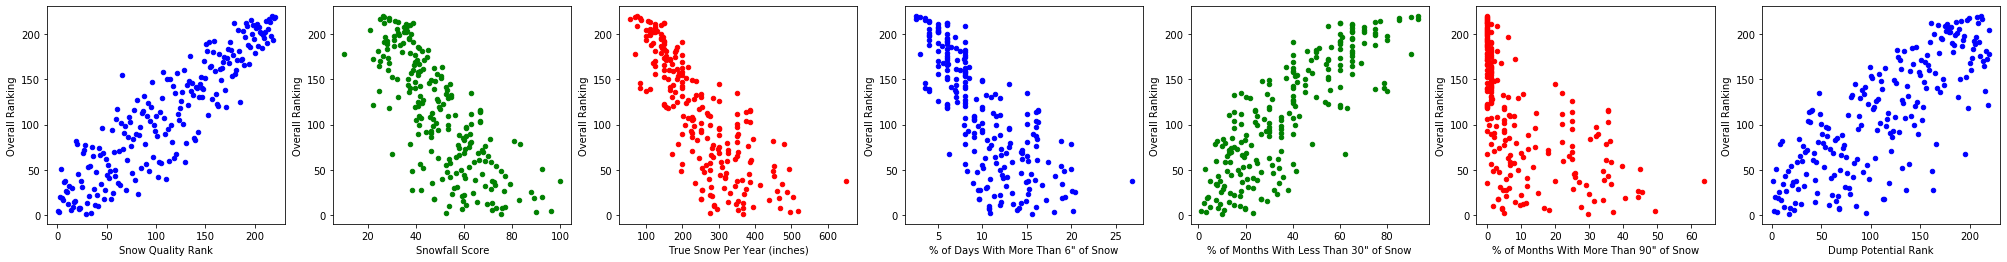

In [65]:
'''
Shown are columns relating to snowfall

Positive Linear Relationship(s): Snow Quality Rank, % of Months With Less than 30" of Snow, 
and Dump Potential Rank
Negative Linear Relationship(s): Snowfall Score, True Snow Per Year (inches), 
% od Days With More than 6" of Snow, and % of Months With More Than 90" of Snow
'''
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(35, 4))
zRankings.plot(ax=axes[0], kind='scatter', x='Snow Quality Rank', y='Overall Ranking',c='b')
zRankings.plot(ax=axes[1], kind='scatter', x='Snowfall Score', y='Overall Ranking',c='g')
zRankings.plot(ax=axes[2], kind='scatter', x='True Snow Per Year (inches)', y='Overall Ranking',c='r')
zRankings.plot(ax=axes[3], kind='scatter', x='% of Days With More Than 6" of Snow', y='Overall Ranking',c='b')
zRankings.plot(ax=axes[4], kind='scatter', x='% of Months With Less Than 30" of Snow', y='Overall Ranking',c='g')
zRankings.plot(ax=axes[5], kind='scatter', x='% of Months With More Than 90" of Snow', y='Overall Ranking',c='r')
zRankings.plot(ax=axes[6], kind='scatter', x='Dump Potential Rank', y='Overall Ranking',c='b')

plt.show()

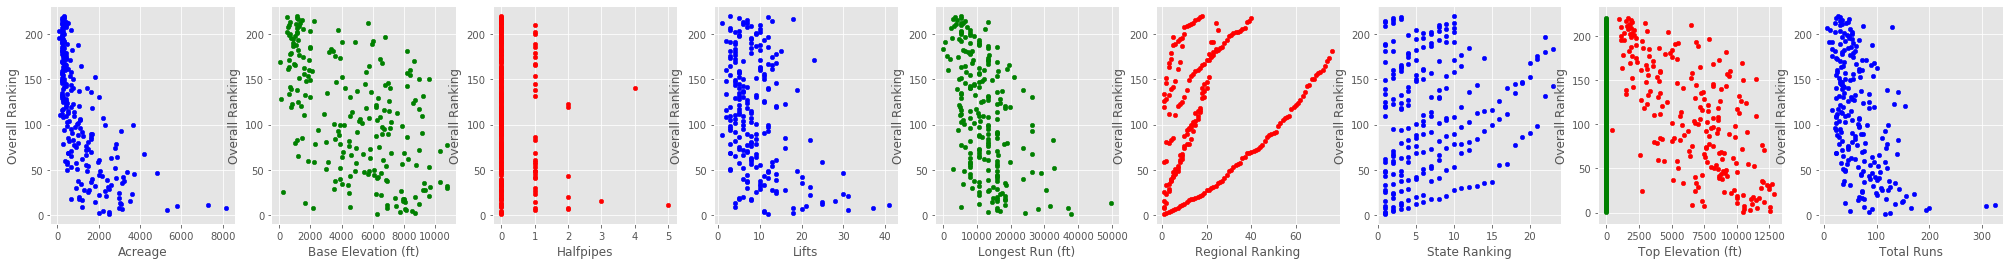

In [55]:
'''
Shown are resort features

Positive Linear Relationship(s): NA
Negative Linear Relationship(s): Acreage, Lifts, Longest Run (ft), Top Elevation, and Total Runs
'''
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(35, 4))

zRankings.plot(ax=axes[0], kind='scatter', x='Acreage', y='Overall Ranking',c='b')
zRankings.plot(ax=axes[1], kind='scatter', x='Base Elevation (ft)', y='Overall Ranking',c='g')
zRankings.plot(ax=axes[2], kind='scatter', x='Halfpipes', y='Overall Ranking',c='r')
zRankings.plot(ax=axes[3], kind='scatter', x='Lifts', y='Overall Ranking',c='b')
zRankings.plot(ax=axes[4], kind='scatter', x='Longest Run (ft)', y='Overall Ranking',c='g')
zRankings.plot(ax=axes[5], kind='scatter', x='Regional Ranking', y='Overall Ranking',c='r')
zRankings.plot(ax=axes[6], kind='scatter', x='State Ranking', y='Overall Ranking',c='b')
zRankings.plot(ax=axes[7], kind='scatter', x='Terrain Parks', y='Overall Ranking',c='g')
zRankings.plot(ax=axes[7], kind='scatter', x='Top Elevation (ft)', y='Overall Ranking',c='r')
zRankings.plot(ax=axes[8], kind='scatter', x='Total Runs', y='Overall Ranking',c='b')


plt.show()

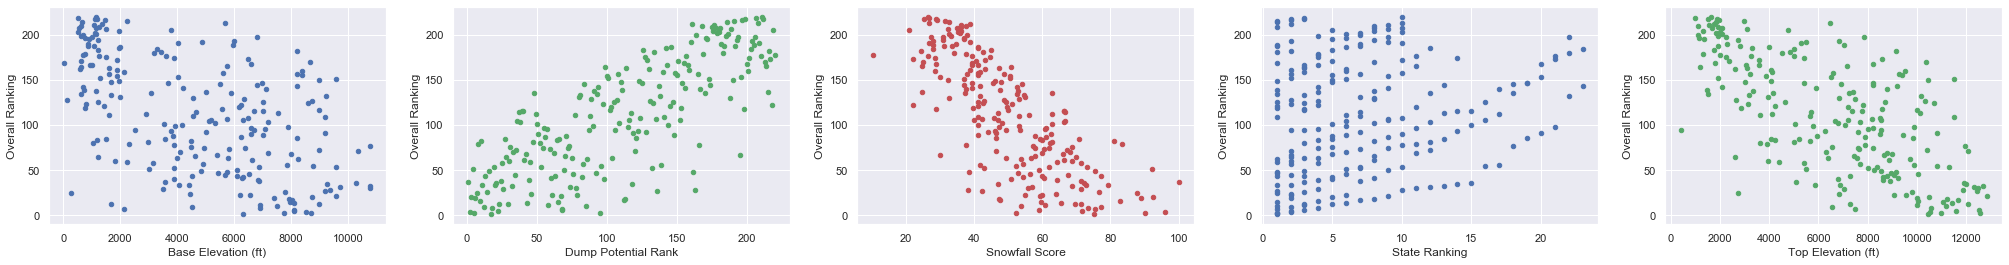

In [79]:
'''
Shown are independent variables with a p-value < 0.05

Positive Linear Relationship(s): Dump Potential Rank
Negative Linear Relationship(s): Snowfall Score, Top Elevation (ft)
'''
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35, 4))

zRankings.plot(ax=axes[0], kind='scatter', x='Base Elevation (ft)', y='Overall Ranking',c='b')
zRankings.plot(ax=axes[1], kind='scatter', x='Dump Potential Rank', y='Overall Ranking',c='g')
zRankings.plot(ax=axes[2], kind='scatter', x='Snowfall Score', y='Overall Ranking',c='r')
zRankings.plot(ax=axes[3], kind='scatter', x='State Ranking', y='Overall Ranking',c='b')
zRankings.plot(ax=axes[4], kind='scatter', x='Top Elevation (ft)', y='Overall Ranking',c='g')

# Zone Breakdown

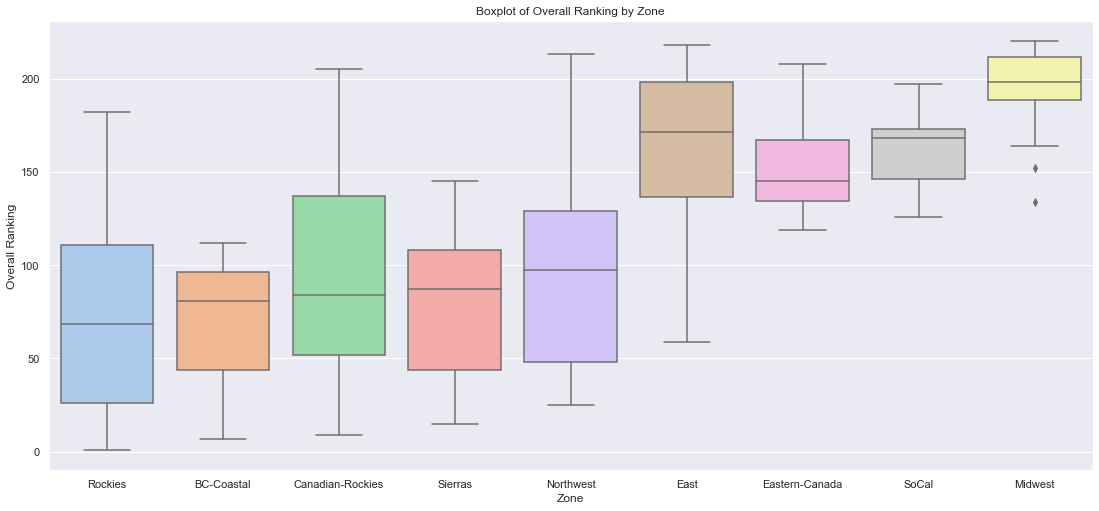

In [74]:
#boxplot of overall ranking by zone
sns.boxplot(x='Zone', y='Overall Ranking', data=zRankings, palette='pastel')
plt.title("Boxplot of Overall Ranking by Zone")
plt.xlabel('Zone')
plt.ylabel('Overall Ranking')
sns.set(rc={'figure.figsize':(18.7,8.27)})


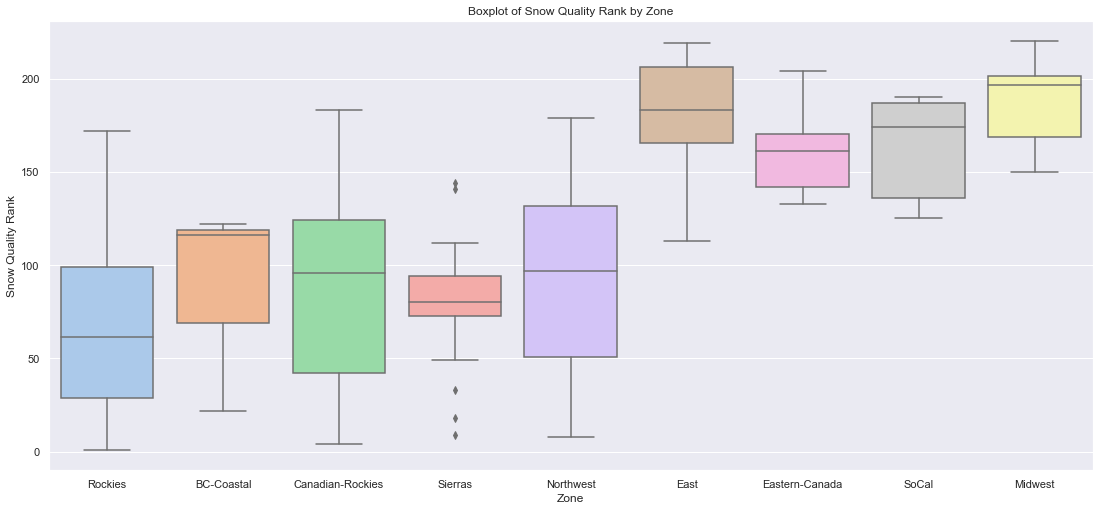

In [75]:
#boxplot of snow quality ranking by zone
sns.boxplot(x='Zone', y='Snow Quality Rank', data=zRankings, palette='pastel')
plt.title("Boxplot of Snow Quality Rank by Zone")
plt.xlabel('Zone')
plt.ylabel('Snow Quality Rank')
sns.set(rc={'figure.figsize':(18.7,8.27)})


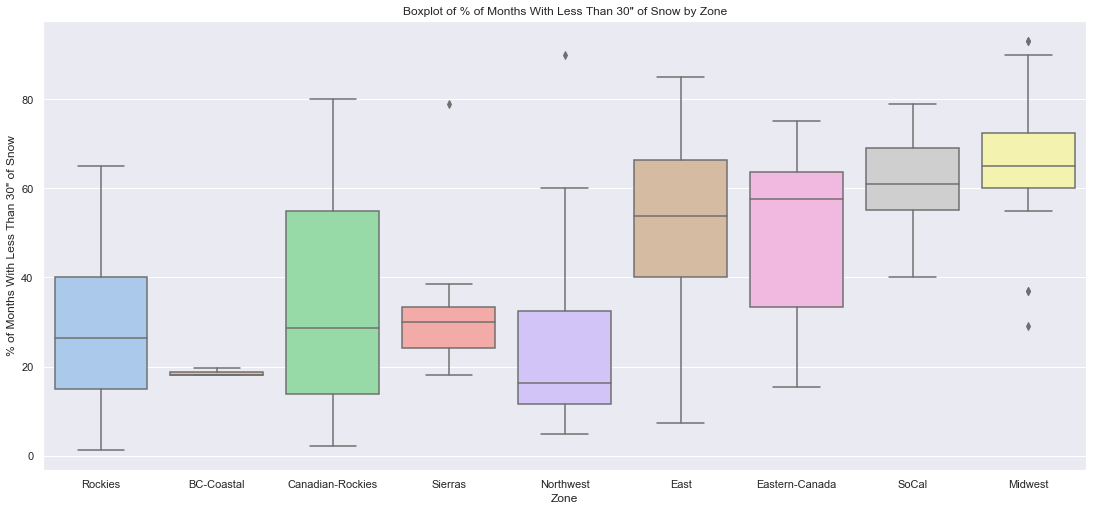

In [77]:
#boxplot of % of Months With Less Than 30" of Snow by zone
sns.boxplot(x='Zone', y='% of Months With Less Than 30" of Snow', data=zRankings, palette='pastel')
plt.title("Boxplot of % of Months With Less Than 30\" of Snow by Zone")
plt.xlabel('Zone')
plt.ylabel('% of Months With Less Than 30" of Snow')
sns.set(rc={'figure.figsize':(18.7,8.27)})


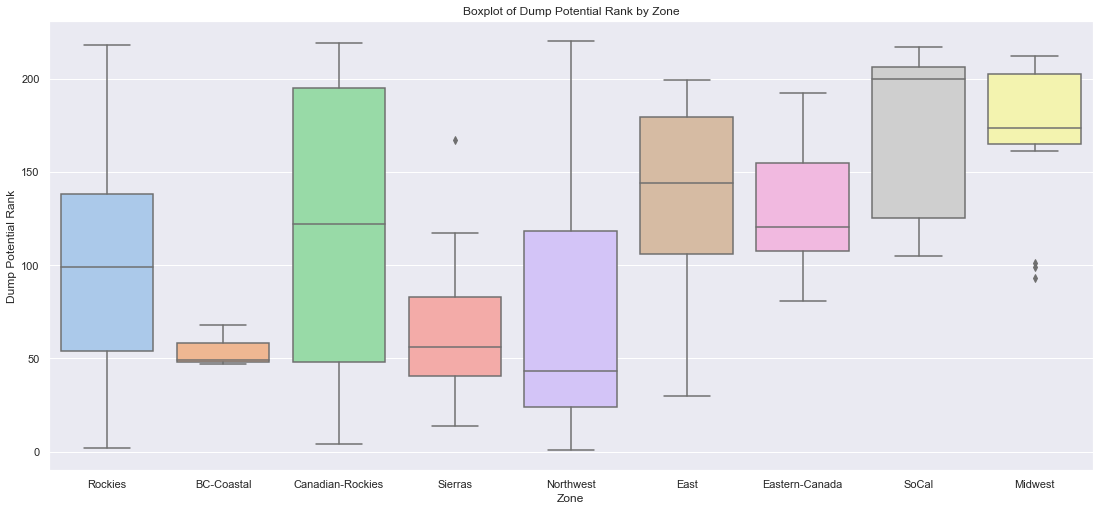

In [78]:
#boxplot of dump potential rank by zone
sns.boxplot(x='Zone', y='Dump Potential Rank', data=zRankings, palette='pastel')
plt.title("Boxplot of Dump Potential Rank by Zone")
plt.xlabel('Zone')
plt.ylabel('Dump Potential Rank')
sns.set(rc={'figure.figsize':(18.7,8.27)})
